In [3]:
#importing required Python libraries 

import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [60]:
response = requests.get("https://api.covid19india.org/data.json")
data1 = response.json()
case_time_series_data = data1['cases_time_series']
data_len = len(case_time_series_data)
data = []
#totalDataList = []
for i in range (0, data_len):
    #print(i)
    date = case_time_series_data[i]['date'] + "2020"
    #print(date)
    confirmed = int(case_time_series_data[i]['dailyconfirmed'])
    deceased = int(case_time_series_data[i]['dailydeceased'])
    recovered = int(case_time_series_data[i]['dailyrecovered'])
    totalconfirmed = int(case_time_series_data[i]['totalconfirmed'])
    data.append([date,confirmed,deceased,recovered,totalconfirmed])

In [61]:
df = pd.DataFrame(data, columns = ['date','confirmed','deceased','recovered','totalconfirmed'])

In [35]:
df.head()

,date,confirmed,deceased,recovered,totalconfirmed
0,30 January 2020,1,0,0,1
1,31 January 2020,0,0,0,1
2,01 February 2020,0,0,0,1
3,02 February 2020,1,0,0,2
4,03 February 2020,1,0,0,3


In [62]:
from datetime import datetime

for i in range(0, len(df)):
    date = df['date'][i]
    df['date'][i] = datetime.strptime(date, '%d %B %Y')

In [37]:
df.head()

,date,confirmed,deceased,recovered,totalconfirmed
0,2020-01-30 00:00:00,1,0,0,1
1,2020-01-31 00:00:00,0,0,0,1
2,2020-02-01 00:00:00,0,0,0,1
3,2020-02-02 00:00:00,1,0,0,2
4,2020-02-03 00:00:00,1,0,0,3


In [63]:
df.index = pd.to_datetime(df.date)
df

,date,confirmed,deceased,recovered,totalconfirmed
date,,,,,
2020-01-30,2020-01-30 00:00:00,1,0,0,1
2020-01-31,2020-01-31 00:00:00,0,0,0,1
2020-02-01,2020-02-01 00:00:00,0,0,0,1
2020-02-02,2020-02-02 00:00:00,1,0,0,2
2020-02-03,2020-02-03 00:00:00,1,0,0,3
...,...,...,...,...,...
2020-07-01,2020-07-01 00:00:00,19429,438,12064,605224
2020-07-02,2020-07-02 00:00:00,21947,378,19999,627171
2020-07-03,2020-07-03 00:00:00,22718,444,14417,649889


In [64]:
df = df.drop('date', axis = 1)
df

,confirmed,deceased,recovered,totalconfirmed
date,,,,
2020-01-30,1,0,0,1
2020-01-31,0,0,0,1
2020-02-01,0,0,0,1
2020-02-02,1,0,0,2
2020-02-03,1,0,0,3
...,...,...,...,...
2020-07-01,19429,438,12064,605224
2020-07-02,21947,378,19999,627171
2020-07-03,22718,444,14417,649889


In [40]:
df.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03',
               '2020-07-04', '2020-07-05'],
              dtype='datetime64[ns]', name='date', length=158, freq=None)

In [65]:
df['Ticks'] = range(0,len(df.index.values))
df.head()

,confirmed,deceased,recovered,totalconfirmed,Ticks
date,,,,,
2020-01-30,1,0,0,1,0
2020-01-31,0,0,0,1,1
2020-02-01,0,0,0,1,2
2020-02-02,1,0,0,2,3
2020-02-03,1,0,0,3,4


In [14]:
df.tail() 

,confirmed,deceased,recovered,totalconfirmed,Ticks
date,,,,,
2020-07-01,19429,438,12064,605224,153
2020-07-02,21947,378,19999,627171,154
2020-07-03,22718,444,14417,649889,155
2020-07-04,24018,611,14746,673907,156
2020-07-05,23941,421,15829,697848,157


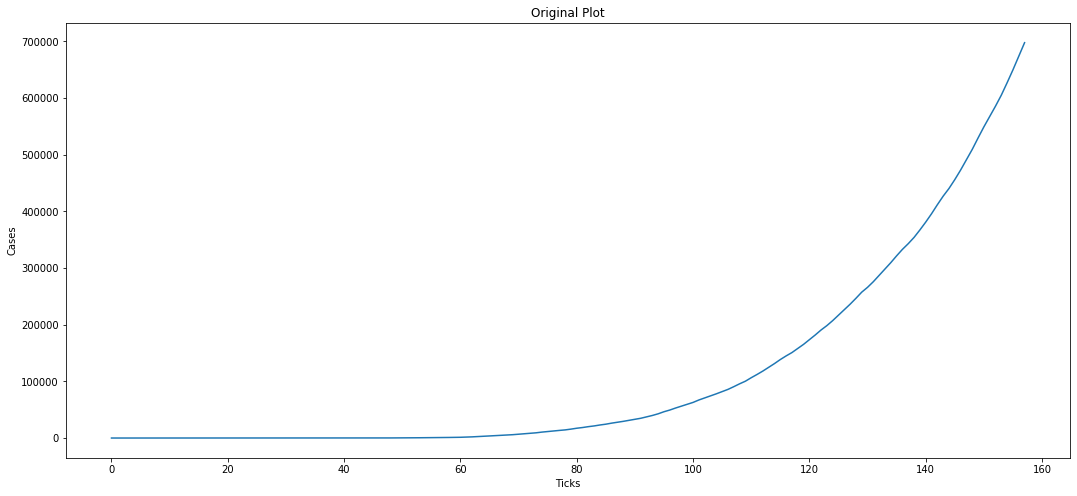

In [66]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Cases')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'totalconfirmed', data = df);

In [67]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = pd.Series(ts).rolling(window=12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

In [68]:
import warnings
warnings.filterwarnings("ignore")

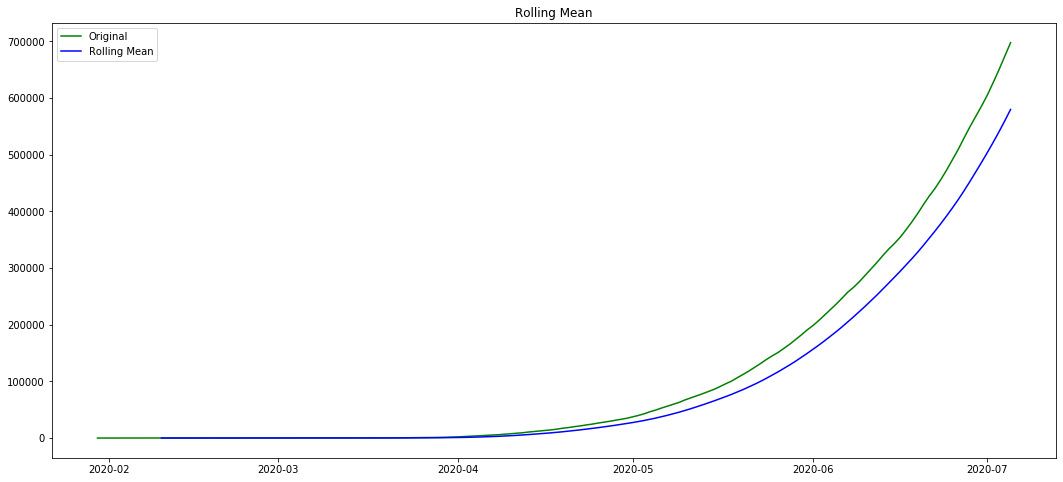

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-0.2181654781740122, 0.9363214170805073, 14, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 2156.6287964517246)
df_output: 
 Test Statistic                  -0.218165
p-value                          0.936321
#Lags Used                      14.000000
Number of Observations Used    143.000000
dtype: float64
Test Statistic                  -0.218165
p-value                          0.936321
#Lags Used                      14.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [69]:
stationarity_check(df.totalconfirmed)

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

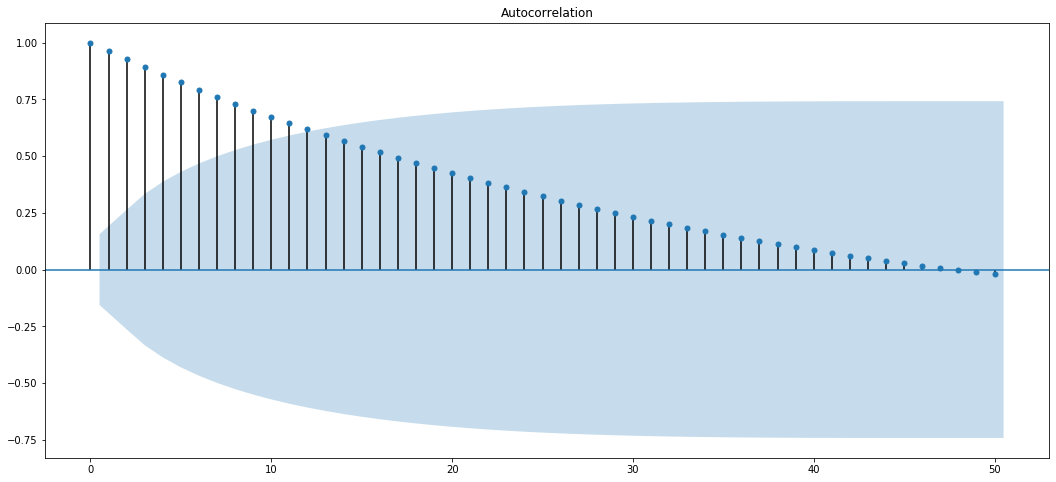

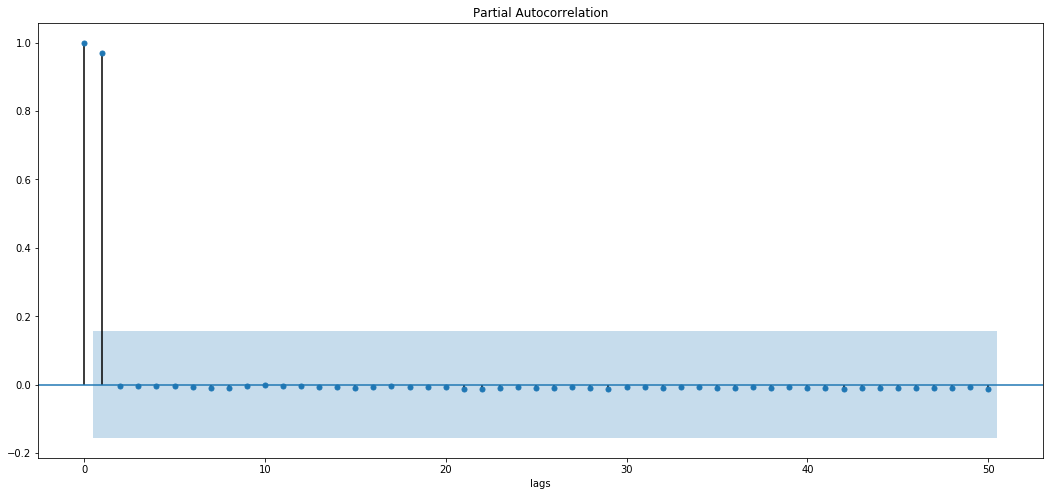

In [71]:
plot_acf(df.totalconfirmed, lags=50)
plot_pacf(df.totalconfirmed, lags=50)
plt.xlabel('lags')
plt.show()

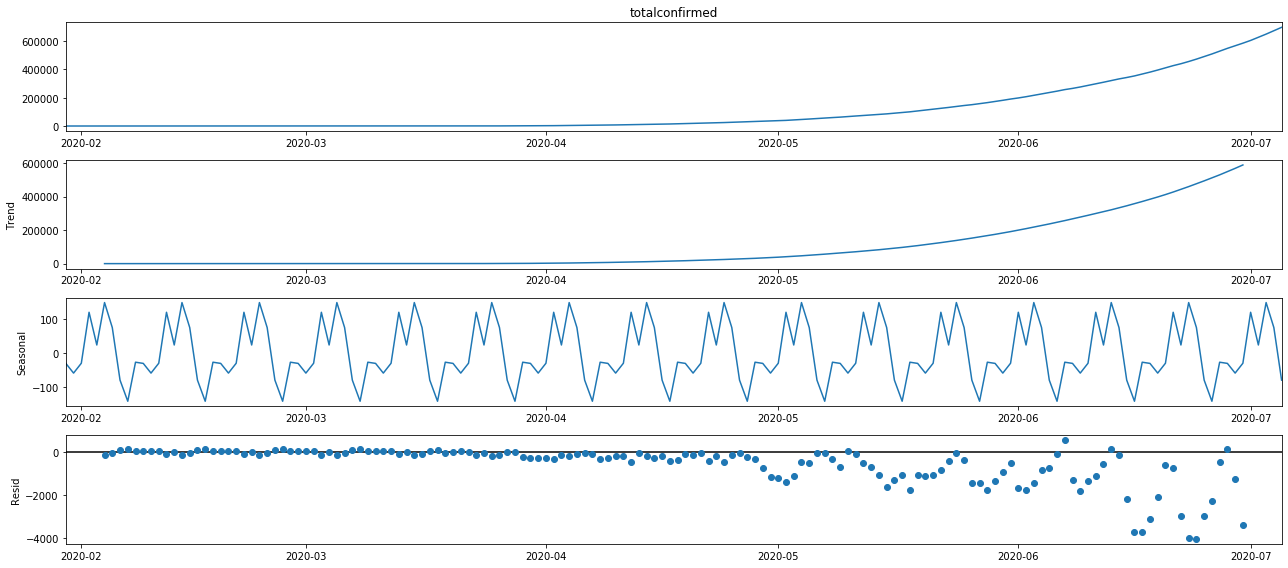

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df.totalconfirmed, model='additive', filt=None, freq=10)
fig = decomposition.plot()
plt.show()

In [73]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [74]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.totalconfirmed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4295.080534742884
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3896.381461238013
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3686.585063123647
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3323.499042417279
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3151.9905995718964
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3059.8531959027896
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2724.207177437904
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2743.582756390979
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4155.915315021438
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4024.6181965259043
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3558.378027523151
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3243.5726332915146
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3854.9789711954345
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3804.1884657108276
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3337.1223026210946
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3232.5228264794296
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3233.37306157061
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2926.6422247265464
AR

In [75]:
mod = sm.tsa.statespace.SARIMAX(df.totalconfirmed,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0303      0.004    253.721      0.000       1.022       1.038
ma.L1         -0.2489      0.077     -3.212      0.001      -0.401      -0.097
ar.S.L12      -0.4659      0.104     -4.491      0.000      -0.669      -0.263
ma.S.L12      -1.0002      0.077    -12.990      0.000      -1.151      -0.849
sigma2      3.377e+05   2.28e-07   1.48e+12      0.000    3.38e+05    3.38e+05


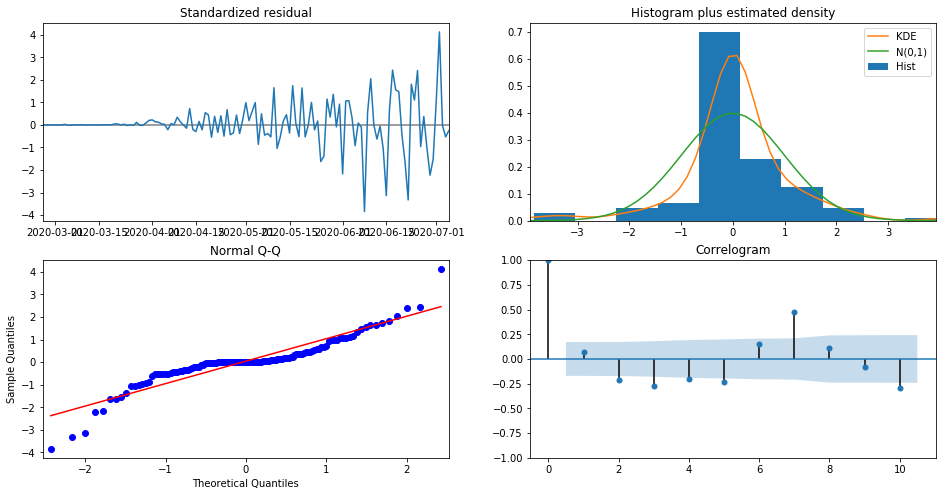

In [76]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [77]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

In [80]:
pred_ci.head(26)

,lower totalconfirmed,upper totalconfirmed
2020-07-06,7.213207e+05,7.236881e+05
2020-07-07,7.449225e+05,7.497579e+05
2020-07-08,7.691664e+05,7.769662e+05
2020-07-09,7.935261e+05,8.047576e+05
2020-07-10,8.188095e+05,8.339158e+05
2020-07-11,8.455953e+05,8.650026e+05
2020-07-12,8.734003e+05,8.975238e+05
2020-07-13,9.016585e+05,9.309065e+05
2020-07-14,9.298691e+05,9.646459e+05
2020-07-15,9.588828e+05,9.995908e+05


In [29]:
pred_ci.to_csv('predictions_0607.csv')

In [81]:
residual = results.get_prediction(dynamic=False)

In [82]:
residual1 = residual.predicted_mean - df.totalconfirmed

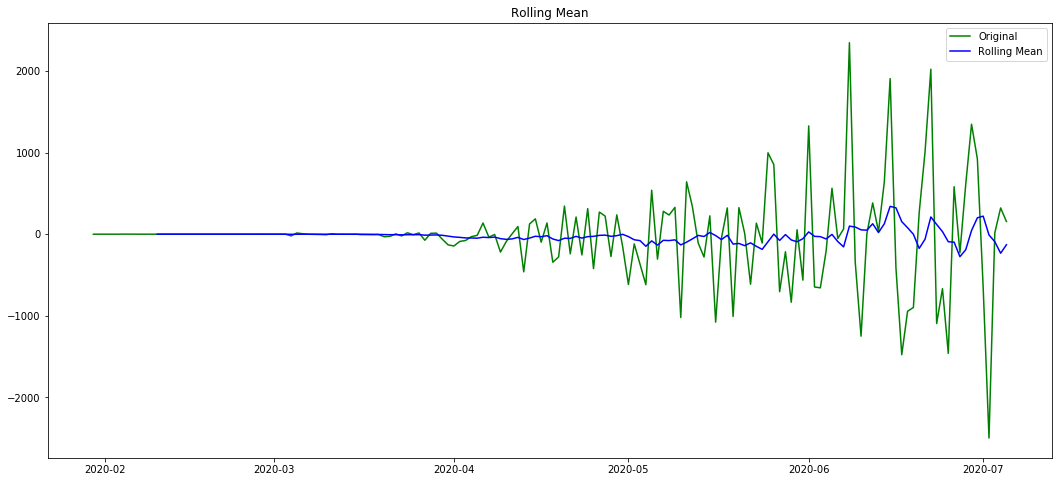

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-3.2460296278387943, 0.017470193082467264, 14, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 2154.4394687189424)
df_output: 
 Test Statistic                  -3.24603
p-value                          0.01747
#Lags Used                      14.00000
Number of Observations Used    143.00000
dtype: float64
Test Statistic                  -3.246030
p-value                          0.017470
#Lags Used                      14.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [83]:
stationarity_check(residual1)